# Lil' Air Cleaner



I designed and implemented a very mobile air cleaner that got a [lot of love on Twitter](https://twitter.com/eddericu/status/1622655077159735298), for use in situations where I can't easily mask, such as going to the dentist. It uses a HEPA filter. In theory, once air flows through the the filter, it should be very clean air, since HEPAs have a high single-pass filtration efficiency. Therefore, breathing directly from it can be a strategy to decrease inhalation of indoor pollution such as airborne viruses. However, as one goes farther away from the device, the clean air will mix with air from the surroundings, which may be polluted. One question with this design is how distance affects aerosol reduction. Does being 6 inches away from it give a 99% reduction? Is it more like 90%? Or 50%? This is the question that we'll tackle here. Using the very quiet [Arctic P14 fan](https://www.arctic.de/en/P14/ACFAN00136A) and the [QT3 filter](https://www.smarterhepa.com/collections/our-products/products/qt3-replacement-hepa-filters-2-pack) in a push configuration resulted in at least a 75% reduction of PM 1.0 when the device is placed 6 inches away or less from the particle counter.

In [11]:
import pandas as pd


In [12]:
df = pd.read_csv('/Users/eugaddan/data_logging/2023-02-11_18-38-00-SPS3x_C508CCF167AD3911.edf', sep='\t')

In [19]:
df['date_time'] = pd.to_datetime(df['Local_Date_Time'])

In [24]:
df_by_date = df.set_index('date_time')

## Methods

### Building the device

Requirements:
- 3D printer
- super glue
- [STL files](https://t.co/RS766gWfs4)
- [Arctic P14 Fan with PWM](https://www.arctic.de/en/P14/ACFAN00136A)
- [CRJ USB](https://t.co/KRRSHRDfJM)
- [45mm M4 Bolts](https://t.co/oY6ry4wkoV)
- [M4 nuts](https://t.co/oY6ry4wkoV)
- [washers](https://t.co/jKK0wxUkQE)
- [Power bank](https://t.co/bn5DQykBfu)
- [weather stripping](https://t.co/LSiYUczXxB)
- [shoulder strap](https://t.co/UsALTtfbCf)

### Aqueous Solution of Salt as an Aerosol Source

I used [Rob Wissman's instructions](https://twitter.com/robwiss/status/1594196669649735680) to create the mixture. He mentioned that in the [Dal Porto, Cappa, Corsi paper](https://www.tandfonline.com/doi/full/10.1080/02786826.2022.2054674), they used an aqueous salt solution of 100g / 1L to test Corsi-Rosenthal boxes. In the blog post linked in Rob's instructions, he mentioned that using regular salt has iodine, which makes it harder to aerosolize. Instead he recommends using a Kosher salt and distilled water to make the mixture as an option, and this is what I did.

\begin{equation}
\begin{aligned}
  100 g / L &=  100 g / L \cdot 1L \text{ }H_{2}O  / 4.22675 \text{cups }H_{2}O \\
  &= 100g \text{ salt} / 4.22675 \text{ cups water} \\
  &= 23.658g \text{ salt} / 1 \text{ cup water}
\end{aligned}
\end{equation}

I didn't have access to weight scale, so I looked up the conversion of mass to volume for Kosher salt. There is 288 grams of salt per 1 cup.
\begin{equation}
\begin{aligned}
  23.658g \text{ salt} / 1 \text{ cup water} \cdot 1 \text{ cup} / 288 g &= 0.08215 \text{ cups salt} / 1 \text{ cup water} \\
  &= 0.08215 \text{ cups salt} / 1 \text{ cup water} \cdot 48 \text{ tsp} / 1 \text{ cup} \\
  &= 3.9432 \text{ tsp salt} / 1 \text{ cup water}
\end{aligned}
\end{equation}

I rounded up and used 4 teaspoons of Kosher salt for the 1 cup of water.

### Aerosolization of Salt

Instead of the Wellue nebulizer described in the [Dal Porto, Cappa, Corsi paper](https://www.tandfonline.com/doi/full/10.1080/02786826.2022.2054674) paper and  in [Rob Wissman's instructions](https://twitter.com/robwiss/status/1594196669649735680), I used an ultrasonic humidifier. The humidifier releases the salt solution in the air. The water evaporates, which then creates fine particulate matter, which can be suspended in the air for hours.

### Particulate Matter Detection

Tiny aerosols in the air can be detected by using low-cost sensors. In [Rob Wissman's instructions](https://twitter.com/robwiss/status/1594196669649735680), he recommended Sensirion's SPS30. That's what I used here.

### Why only use PM 1.0 instead of PM 2.5?

For this research, I only looked at the mass concentration of PM 1.0. PM 1.0 describes particles with a diameter of 1.0 microns or less, while PM 2.5 decribes particles with a diameter of 2.5 microns or less. SPS30 provides measurements for PM 1.0, PM 2.5, PM 4.0, and PM 10. However, [low-cost sensors are known to be inaccurate with particle sizes larger than 1.0](https://twitter.com/Smogdr/status/1623479579363971072?s=20&t=PGOWawGIIn93l5EdwXoBOg), so I used PM 1.0 mass concentrations to measure the effect of the air cleaner on particulate matter concentration.

### Environment
I did the experiment in a tiny bathroom, with the door closed. 

### Relative PM Reduction Calculation

In order to ascertain the effects of distance, first, I let the aerosols build up. Once it has built up to some level, I turned off the ultrasonic humidifier. At the point where readings have plateaued, this became the starting concentration. Then, given a specified distance, I would run the fan long enough for the measured concentration to decay to a flat line. The concentration at the flat line is then considered the ending concentration of the intervention.

The relative reduction then, is as follows:

\begin{equation}
\begin{aligned}
  RR &= \frac{\text{initial concentration } - \text{ final concentration} }{\text{initial concentration}}
\end{aligned}
\end{equation}

After the air cleaner is turned on, I would turn it off so that the readings would stabilize back to the room concentration, which then become the initial concentration for the next experiment. I ran this experiment starting with 6 inches, decreasing by 1-inch for each experiment.

## Push and Pull

I explored two configurations: pull and push. The pull configuration is the setup in which the air cleaner pulls air from the HEPA filter and directs it toward the breathing area. The push configuration, on the other hand, is the setup in which the air cleaner pushes air through the HEPA filter, which then gets directed toward the breathing area. Earlier, I thought that the configurations wouldn't make a difference, but it does! See [similar work](https://twitter.com/ee_kelsey/status/1517887279456567297?s=20&t=7cLaKALML5HgMzqjjX1MDw) in which others get similar results. Given the same distance, the push configuration results in air going straight (with little mixing with the dirty air), while the pull configuration leads to the clean air being mixed more with the dirty air. We find the same pattern below:

In the graph below, I show the effects of the pull configuration vs. the push configuration. The pull configuration was used from 18:40 to about 19:00. Afterwards, I spent some time reconfiguring it into a push configuration. The push experiment was then done starting around 19:08. 

**It is clear that the push configuration is superior to the pull configuration. The push configuration results in much bigger relative risk reductions for the same distance.**


<AxesSubplot: title={'center': 'Turning Air Cleaner on/off while changing Distance'}, xlabel='date_time', ylabel='PM 1.0 Mass concentration'>

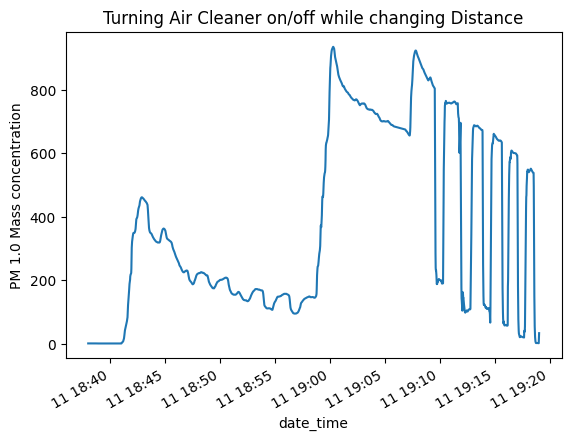

In [94]:
df_by_date['MassConc_1p0_SPS3x_C508CCF167AD3911'].plot(ylabel='PM 1.0 Mass concentration', title='Turning Air Cleaner on/off while changing Distance')

## Push configuration

In [36]:
six_inches_push = df_by_date[(df_by_date.index > '2023-02-11 19:09:30') & (df_by_date.index < '2023-02-11 19:10:03')]['MassConc_1p0_SPS3x_C508CCF167AD3911']

<AxesSubplot: title={'center': 'Push - 6 inches - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

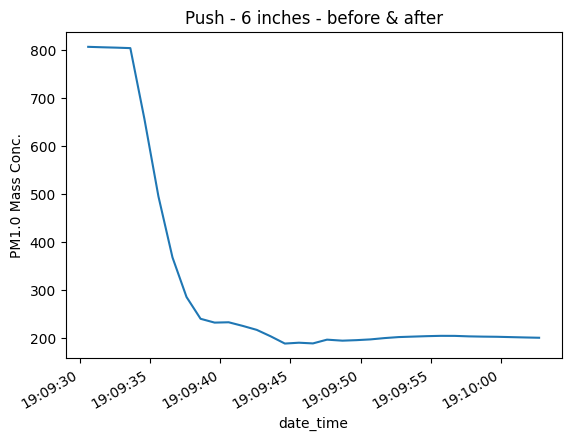

In [97]:

six_inches_push.plot(title='Push - 6 inches - before & after', ylabel='PM1.0 Mass Conc.')

In [50]:
def relative_risk_reduction(df):
    return (df.iloc[0] - df.iloc[-1]) / df.iloc[0]

In [51]:
relative_risk_reduction(six_inches_push)

0.7518643987151383

In [48]:
five_inches_push = df_by_date[(df_by_date.index > '2023-02-11 19:11:03') & (df_by_date.index < '2023-02-11 19:12:15')]['MassConc_1p0_SPS3x_C508CCF167AD3911']

<AxesSubplot: title={'center': 'Push - 5 inches - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

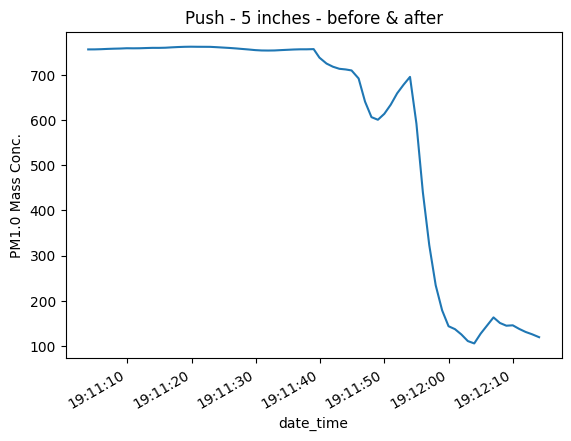

In [98]:
five_inches_push.plot(title='Push - 5 inches - before & after', ylabel='PM1.0 Mass Conc.')

In [52]:
relative_risk_reduction(five_inches_push)

0.8434224956196814

In [66]:
four_inches_push = df_by_date[(df_by_date.index > '2023-02-11 19:13:20') & (df_by_date.index < '2023-02-11 19:14:30')]['MassConc_1p0_SPS3x_C508CCF167AD3911']

<AxesSubplot: title={'center': 'Push - 4 inches - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

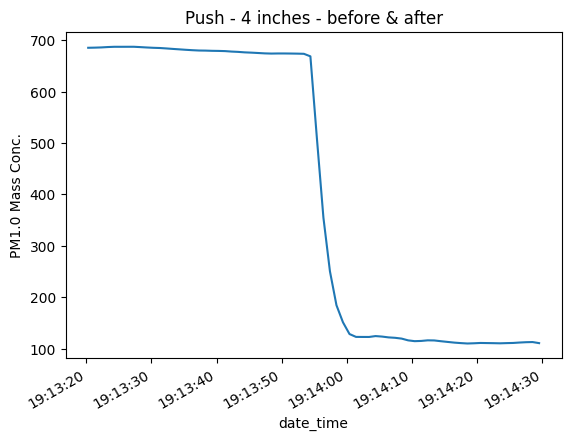

In [99]:
four_inches_push.plot(title='Push - 4 inches - before & after', ylabel='PM1.0 Mass Conc.')

In [68]:
relative_risk_reduction(four_inches_push)

0.8383417768881887

In [73]:
three_inches_push = df_by_date[(df_by_date.index > '2023-02-11 19:15:03') & (df_by_date.index < '2023-02-11 19:16:00')]['MassConc_1p0_SPS3x_C508CCF167AD3911']

<AxesSubplot: title={'center': 'Push - 3 inches - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

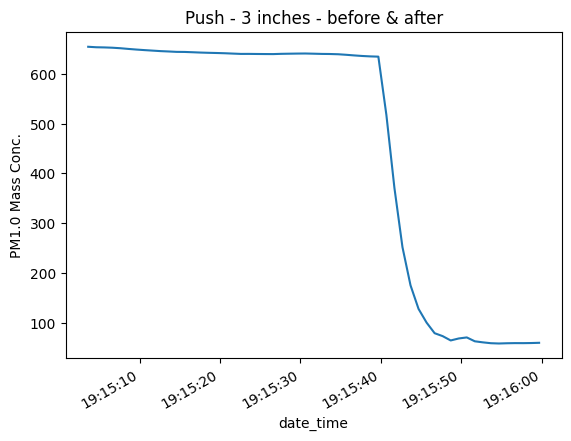

In [100]:

three_inches_push.plot(title='Push - 3 inches - before & after', ylabel='PM1.0 Mass Conc.')

In [76]:
relative_risk_reduction(three_inches_push)

0.9092031382529405

In [77]:
two_inches_push = df_by_date[(df_by_date.index > '2023-02-11 19:16:45') & (df_by_date.index < '2023-02-11 19:17:15')]['MassConc_1p0_SPS3x_C508CCF167AD3911']

<AxesSubplot: title={'center': 'Push - 2 inches - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

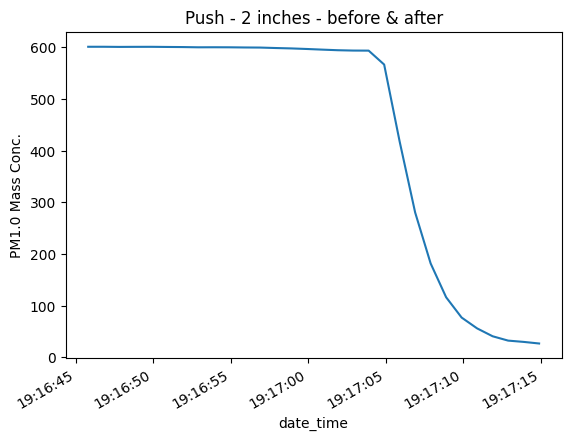

In [102]:
two_inches_push.plot(title='Push - 2 inches - before & after', ylabel='PM1.0 Mass Conc.')

In [79]:
relative_risk_reduction(two_inches_push)

0.9553314225724647

<AxesSubplot: title={'center': 'Push - 1 inch - before & after'}, xlabel='date_time', ylabel='PM1.0 Mass Conc.'>

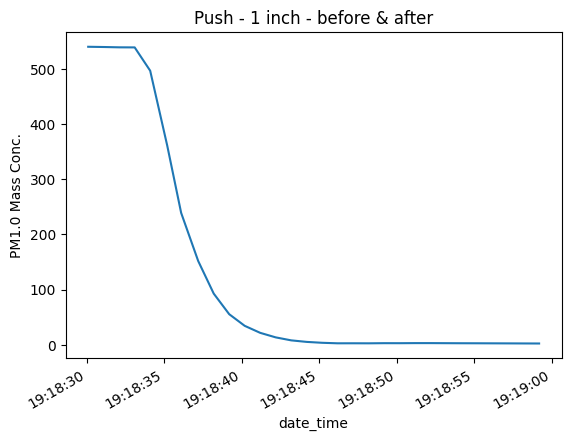

In [103]:
one_inch_push = df_by_date[(df_by_date.index > '2023-02-11 19:18:30') & (df_by_date.index < '2023-02-11 19:19:00')]['MassConc_1p0_SPS3x_C508CCF167AD3911']
one_inch_push.plot(title='Push - 1 inch - before & after', ylabel='PM1.0 Mass Conc.')

In [85]:
relative_risk_reduction(one_inch_push)

0.9956236995806105

In [87]:
results = pd.DataFrame({
    'depth': ['6 in', '5 in', '4 in', '3 in', '2 in', '1 in'],
    'pm_1.0_relative_reduction': [
        relative_risk_reduction(six_inches_push),
        relative_risk_reduction(five_inches_push),
        relative_risk_reduction(four_inches_push),
        relative_risk_reduction(three_inches_push),
        relative_risk_reduction(two_inches_push),
        relative_risk_reduction(one_inch_push),
    ]
})

In [92]:
results.set_index('depth')

,pm_reduction
depth,
6 in,0.751864
5 in,0.843422
4 in,0.838342
3 in,0.909203
2 in,0.955331
1 in,0.995624


<AxesSubplot: title={'center': 'PM 1.0 relative reduction as a function of distance'}, xlabel='depth'>

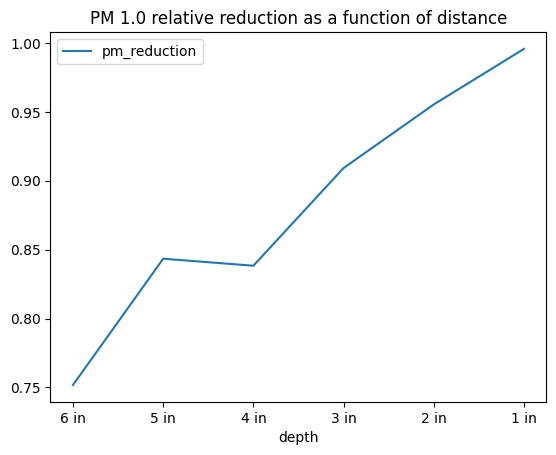

In [90]:
results.set_index('depth').plot(title='PM 1.0 relative reduction as a function of distance')

Using a push configuration at 6 inches away from the breathing area resulted in about a 75% reduction of PM 1.0. This is comparable to forcing an unmasked susceptible and unmasked infector to wear [3-ply cotton face masks](https://www.sciencedirect.com/science/article/pii/S0360132322011507#:~:text=Face%20masks%20were%203%2Dply%20cotton%20cloth%20masks%20with%20ear%20loops) or [surgical masks](https://docs.google.com/spreadsheets/d/16K1OQkLD4BjgBdO8ePj6ytf-RpPMlJ6aXFg3PrIQBbQ/edit#gid=519189277). At 3 inches, we get a 90% reduction of PM 1.0, which is similar to [adding universal masking with the 3-ply cotton masks, along with adding two CR-boxes (1-inch thick filters) on low to a conference room with only 1.89 ACH and 180 $m^3$ air volume (i.e. 200 cubic feet per minute of clean air delivery rate from ventilation)](https://www.sciencedirect.com/science/article/pii/S0360132322011507#:~:text=For%20example%2C%20the%2041%25%20exposure%20with%20the%20DIY%20units%20on%20low%20multiplied%20by%20the%2025%25%20exposure%20with%20masking%20alone%20gives%2010%25%2C%20which%20is%20close%20to%20the%2012%25%20relative%20exposure%20seen%20when%20using%20both%20interventions.). I was able to get 95% relative reduction with 2 inches -- like what a N95 would theoretically give someone if it was tight fitting.

In contrast to Clean Air Stars' results on QT3 performance, the performance of this DIY device was weaker than the QT3 with sealed filters and was better than the QT3 with unsealed filters. Clean Air Stars in their test was able to reach 95% reduction with 20 cm (7.87 inches) in the sealed filters scenario. The 95% reduction on the other hand can only be achieved around 2 inches with the current configuration of the DIY device.

![Clean Air Stars on QT3 performance](https://cdn.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_1024/https://smartairfilters.com/wordpress/wp-content/uploads/2022/12/Screen-Shot-2022-12-23-at-3.18.40-PM-1024x834.jpg)

## Future work
It is possible to improve the performance of the Lil Air Cleaner for the same distance by using a more powerful fan. One can trade-off the quietness of the Arctic P14 fans for more flow. Another possibility for improvement is hooking up a tube to the fan. One end of the tube could be placed near the breathing area. It could also be used as a part of a PAPR.